In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os

In [2]:
li = []
for file in sorted(os.listdir("Dataset")):
    df = pd.read_csv(os.path.join("Dataset", file))
    li.append(df)

TraficoTotal = pd.concat(li, axis=0, ignore_index=True)

/Users/lopoloalex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [3]:
TraficoTotal.head()

,DE_CUSTOMER_NAME,DE_INTERFACE,DT_MEASURE_DATETIME,DT_MEASURE_DATETIME_1,NU_SPEED,NU_TRAFFIC_INPUT,NU_TRAFFIC_OUTPUT,SC_INTERFACE_TYPE,SC_ROUTER,SD_ADMINISTRATIVE_NUMBER,Unnamed: 0
0,BBVA,TenGigabitEthernet0/1/0.100,2.019010e+13,01/01/19,1.000000e+10,13305027.0,14886319.0,WAN,BBVA-ESP-TRC-MW-1-437644,437644.0,NaN
1,BBVA,TenGigabitEthernet0/1/0.100,2.019010e+13,01/01/19,1.000000e+10,12808633.0,15743063.0,WAN,BBVA-ESP-TRC-MW-1-437644,437644.0,NaN
2,BBVA,TenGigabitEthernet0/1/0.100,2.019010e+13,01/01/19,1.000000e+10,13086709.0,16867634.0,WAN,BBVA-ESP-TRC-MW-1-437644,437644.0,NaN
3,BBVA,TenGigabitEthernet0/1/0.100,2.019010e+13,01/01/19,1.000000e+10,12158887.0,17587628.0,WAN,BBVA-ESP-TRC-MW-1-437644,437644.0,NaN
4,BBVA,TenGigabitEthernet0/1/0.100,2.019010e+13,01/01/19,1.000000e+10,17157396.0,17422344.0,WAN,BBVA-ESP-TRC-MW-1-437644,437644.0,NaN


In [4]:
#Funcion que cambia el formato de las fechas 
def change_format(x):
    fec = str(x)
    ano=fec[0:4]
    mes=fec[4:6]
    dia=fec[6:8]
    tiempo=fec[8:14]
    final = ano + '/' + mes + '/' + dia + ' ' + tiempo[0:2] + ':' + tiempo[2:4] + ':' + tiempo[4:6] 
    return final 

In [5]:
#Aplicamos el cambio de formato a las fechas
TraficoTotal['DT_MEASURE_DATETIME'] = TraficoTotal['DT_MEASURE_DATETIME'].apply(change_format)
TraficoTotal['DT_MEASURE_DATETIME'] = pd.to_datetime(TraficoTotal['DT_MEASURE_DATETIME'])
TraficoTotal.head()


,DE_CUSTOMER_NAME,DE_INTERFACE,DT_MEASURE_DATETIME,DT_MEASURE_DATETIME_1,NU_SPEED,NU_TRAFFIC_INPUT,NU_TRAFFIC_OUTPUT,SC_INTERFACE_TYPE,SC_ROUTER,SD_ADMINISTRATIVE_NUMBER,Unnamed: 0
0,BBVA,TenGigabitEthernet0/1/0.100,2019-01-01 00:05:00,01/01/19,1.000000e+10,13305027.0,14886319.0,WAN,BBVA-ESP-TRC-MW-1-437644,437644.0,NaN
1,BBVA,TenGigabitEthernet0/1/0.100,2019-01-01 00:10:00,01/01/19,1.000000e+10,12808633.0,15743063.0,WAN,BBVA-ESP-TRC-MW-1-437644,437644.0,NaN
2,BBVA,TenGigabitEthernet0/1/0.100,2019-01-01 00:15:00,01/01/19,1.000000e+10,13086709.0,16867634.0,WAN,BBVA-ESP-TRC-MW-1-437644,437644.0,NaN
3,BBVA,TenGigabitEthernet0/1/0.100,2019-01-01 00:20:00,01/01/19,1.000000e+10,12158887.0,17587628.0,WAN,BBVA-ESP-TRC-MW-1-437644,437644.0,NaN
4,BBVA,TenGigabitEthernet0/1/0.100,2019-01-01 00:25:00,01/01/19,1.000000e+10,17157396.0,17422344.0,WAN,BBVA-ESP-TRC-MW-1-437644,437644.0,NaN


In [6]:
#Vemos cuantos routers e interfaces contiene cada uno de los datos suministrados
print('Routers')
print(len(TraficoTotal.SC_ROUTER.unique()))
print(TraficoTotal.SC_ROUTER.unique())

print('Interfaces')
print(len(TraficoTotal.DE_INTERFACE.unique()))
print(TraficoTotal.DE_INTERFACE.unique())





Routers
6
['BBVA-ESP-TRC-MW-1-437644' 'BBVA-ESP-TRC-MW-2-437644'
 'BBVA-MEX-ATA-MW-1-1006634' 'BBVA-MEX-ATA-MW-2-1006634'
 'CMEX-MEX-OCCRTRDW01' 'CMEX-ESP-OCCRTRDW01']
Interfaces
66
['TenGigabitEthernet0/1/0.100' 'TenGigabitEthernet0/1/0.101'
 'TenGigabitEthernet0/1/0.102' 'TenGigabitEthernet0/1/0.104'
 'TenGigabitEthernet0/1/0.106' 'TenGigabitEthernet0/1/0.107' 'Tunnel5'
 'Tunnel59' 'Tunnel60' 'TenGigabitEthernet0/1/0'
 'TenGigabitEthernet0/1/0.103' 'TenGigabitEthernet0/1/0.109'
 'TenGigabitEthernet0/1/0.108' 'TenGigabitEthernet0/1/0.110'
 'TenGigabitEthernet0/1/0.111' 'TenGigabitEthernet0/1/0.112'
 'TenGigabitEthernet0/1/0.113' 'TenGigabitEthernet0/1/0.114'
 'TenGigabitEthernet0/1/0.115' 'TenGigabitEthernet0/1/0.116' 'Tunnel50'
 'Tunnel63' 'Tunnel64' 'Tunnel1' 'Tunnel65' 'Tunnel2' 'Tunnel3' 'Tunnel4'
 'Tunnel57' 'Tunnel58' 'Tunnel54' 'Tunnel55' 'Tunnel56' 'Tunnel61'
 'Tunnel62' 'GigabitEthernet0/0/0' 'GigabitEthernet0/0' 'Tunnel6'
 'TenGigabitEthernet0/1/0.120' 'Tunnel7' 'Tunnel8' 'T

In [7]:
#Para cada uno de los routers, vemos que interfaces contiene 
routers=TraficoTotal.SC_ROUTER.unique()
interfaces=TraficoTotal.DE_INTERFACE.unique()
for router in routers:
    rou = TraficoTotal.loc[TraficoTotal.SC_ROUTER == router]
    print('Router:  ' + router)
    print(rou.DE_INTERFACE.unique()) 

Router:  BBVA-ESP-TRC-MW-1-437644
['TenGigabitEthernet0/1/0.100' 'TenGigabitEthernet0/1/0.101'
 'TenGigabitEthernet0/1/0.102' 'TenGigabitEthernet0/1/0.104'
 'TenGigabitEthernet0/1/0.106' 'TenGigabitEthernet0/1/0.107'
 'TenGigabitEthernet0/1/0' 'TenGigabitEthernet0/1/0.110' 'Tunnel300'
 'Tunnel301' 'Tunnel307' 'Tunnel302' 'Tunnel303' 'Tunnel304' 'Tunnel305'
 'Tunnel306']
Router:  BBVA-ESP-TRC-MW-2-437644
['TenGigabitEthernet0/1/0.100' 'TenGigabitEthernet0/1/0.101'
 'TenGigabitEthernet0/1/0.102' 'TenGigabitEthernet0/1/0.104'
 'TenGigabitEthernet0/1/0.106' 'TenGigabitEthernet0/1/0.107'
 'TenGigabitEthernet0/1/0' 'Tunnel203' 'Tunnel204'
 'TenGigabitEthernet0/1/0.110' 'Tunnel200' 'Tunnel201' 'Tunnel202'
 'Tunnel205' 'Tunnel206' 'Tunnel207' 'Tunnel210' 'Tunnel211' 'Tunnel212'
 'Tunnel213' 'Tunnel307' 'Tunnel300' 'Tunnel301' 'Tunnel302' 'Tunnel303'
 'Tunnel304' 'Tunnel308' 'Tunnel305' 'Tunnel306']
Router:  BBVA-MEX-ATA-MW-1-1006634
['Tunnel5' 'Tunnel59' 'Tunnel60' 'TenGigabitEthernet0/1/0'
 '

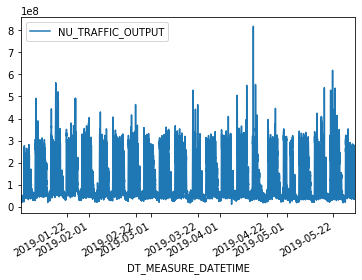

In [14]:
#Router de mexico lleva en funcionamiento 5 años, es el primero que utilizar 
tra1 =  TraficoTotal.loc[TraficoTotal.SC_ROUTER == 'CMEX-MEX-OCCRTRDW01']
tra1=tra1.iloc[:,[2,6]]
tra1.set_index('DT_MEASURE_DATETIME', inplace = True) #Lo seteo como indice 
tra1.plot()


In [ ]:
#Filtrar interfaz


In [22]:
#Estos routers funcionan en balanceo de carga luego tenemos que sumar su tráfico
#BBVAMEXATAMW11006634['TraficoInTotal']=BBVAMEXATAMW11006634['NU_TRAFFIC_INPUT']+BBVAMEXATAMW21006634['NU_TRAFFIC_INPUT']
#BBVAMEXATAMW11006634['TraficoOutnTotal']=BBVAMEXATAMW11006634['NU_TRAFFIC_OUTPUT']+BBVAMEXATAMW21006634['NU_TRAFFIC_OUTPUT']

In [15]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf

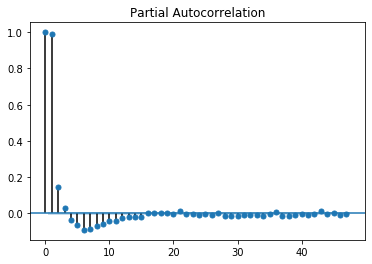

In [16]:
plot_pacf(tra1)
pyplot.show()

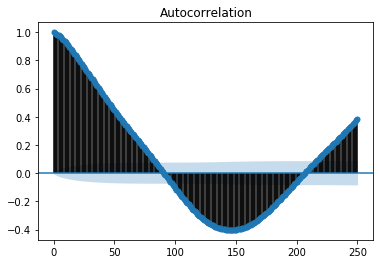

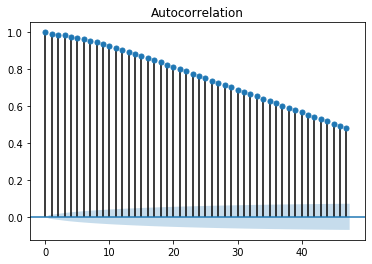

In [20]:
plot_acf(tra1,lags=250)
plot_acf(tra1)
pyplot.show()